## FIFA EDA 

### Libraries

In [29]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

### Data


In [4]:
df = pd.read_csv('../raw_data/fifa22/players_22.csv')

/var/folders/tc/0tkkgmdd25n0rh3_pjfhw6mw0000gp/T/ipykernel_5366/2846777655.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../raw_data/fifa22/players_22.csv')


In [5]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [11]:
for index, col in enumerate(df.columns):
    print(f"{col:<26} | ", end="")
    if (index % 3 == 2):
        print("\n", end="")

sofifa_id                  | player_url                 | short_name                 | 
long_name                  | player_positions           | overall                    | 
potential                  | value_eur                  | wage_eur                   | 
age                        | dob                        | height_cm                  | 
weight_kg                  | club_team_id               | club_name                  | 
league_name                | league_level               | club_position              | 
club_jersey_number         | club_loaned_from           | club_joined                | 
club_contract_valid_until  | nationality_id             | nationality_name           | 
nation_team_id             | nation_position            | nation_jersey_number       | 
preferred_foot             | weak_foot                  | skill_moves                | 
international_reputation   | work_rate                  | body_type                  | 
real_face                  | rel

In [14]:
to_drop = ['club_logo_url','nation_flag_url','club_flag_url','nation_logo_url','player_face_url','dob','player_url',
           'real_face','nation_jersey_number','nation_position']

df2 = df.drop(to_drop, axis = 1)

In [17]:
positions = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',
           'rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
for col in positions:
  df2[col] = df2[col].str.split('+',n=1,expand = True)[0]

### Descriptive Stats

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [8]:
df.shape

(19239, 110)

In [13]:
df.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [18]:
df2.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [57]:
val = df2['player_positions']
pref_pos = []

for i in val:
    a = i.split(',')
    pref_pos.append(a[0])

df2['prefered_pos'] = pref_pos


In [58]:
df2.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,prefered_pos
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,...,64,64,66,61,50,50,50,61,19+3,RW
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185,...,66,66,64,61,60,60,60,61,19+3,ST
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,...,59,59,63,60,53,53,53,60,20+3,ST
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175,...,63,63,67,62,50,50,50,62,20+3,LW
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,...,80,80,79,75,69,69,69,75,21+3,CM


In [74]:
df2['expected_imporvement'] = df2.potential - df2.overall 

In [127]:
df2[df2['expected_imporvement'] < 0].shape

(0, 104)

In [77]:
df_growth = df2[df2['expected_imporvement'] > 0]

df_growth.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,expected_imporvement
count,12830.000000,12830.000000,12830.000000,1.280300e+04,12803.000000,12830.00000,12830.000000,12830.000000,12803.000000,12803.000000,...,12830.000000,12830.000000,12830.000000,12830.000000,12830.000000,12830.000000,12830.000000,12830.000000,1468.000000,12830.000000
mean,243460.984723,64.150818,72.109119,2.787307e+06,7349.714911,22.56968,181.357599,74.314809,47762.020308,1.384285,...,44.900468,46.930164,44.987919,16.256274,16.033827,15.889166,16.006157,16.338192,34.262943,7.958301
std,16198.886817,6.845028,6.010327,7.598372e+06,16308.024489,2.87624,6.944303,7.019074,54042.251676,0.770862,...,20.057669,21.068413,20.439106,17.377953,16.581931,16.348827,16.610724,17.673086,10.530655,4.951780
min,166539.000000,47.000000,51.000000,4.500000e+04,500.000000,16.00000,155.000000,49.000000,1.000000,1.000000,...,4.000000,7.000000,6.000000,3.000000,3.000000,3.000000,3.000000,3.000000,15.000000,1.000000
25%,233021.000000,60.000000,68.000000,4.750000e+05,950.000000,20.00000,176.000000,70.000000,452.000000,1.000000,...,27.000000,27.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,25.000000,4.000000
50%,245232.000000,64.000000,72.000000,9.750000e+05,2000.000000,23.00000,181.000000,74.000000,1917.000000,1.000000,...,50.000000,54.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,33.000000,7.000000
75%,257755.500000,68.000000,76.000000,2.000000e+06,6000.000000,25.00000,186.000000,79.000000,111008.000000,1.000000,...,62.000000,64.000000,62.000000,14.000000,14.000000,14.000000,14.000000,14.000000,42.000000,11.000000
max,264639.000000,91.000000,95.000000,1.940000e+08,290000.000000,30.00000,206.000000,105.000000,115820.000000,5.000000,...,90.000000,90.000000,92.000000,91.000000,92.000000,93.000000,90.000000,90.000000,65.000000,26.000000


### Viz

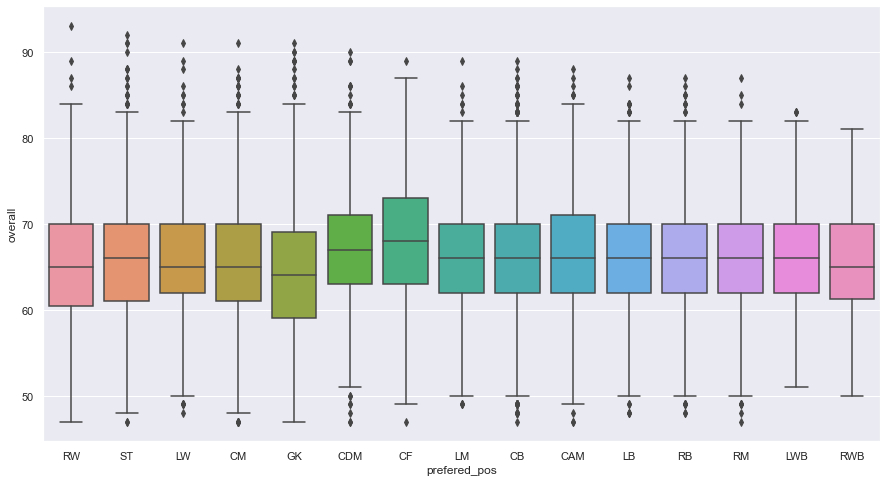

In [73]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x='prefered_pos',y='overall',data=df2)
plt.ticklabel_format(style='plain', axis='y')

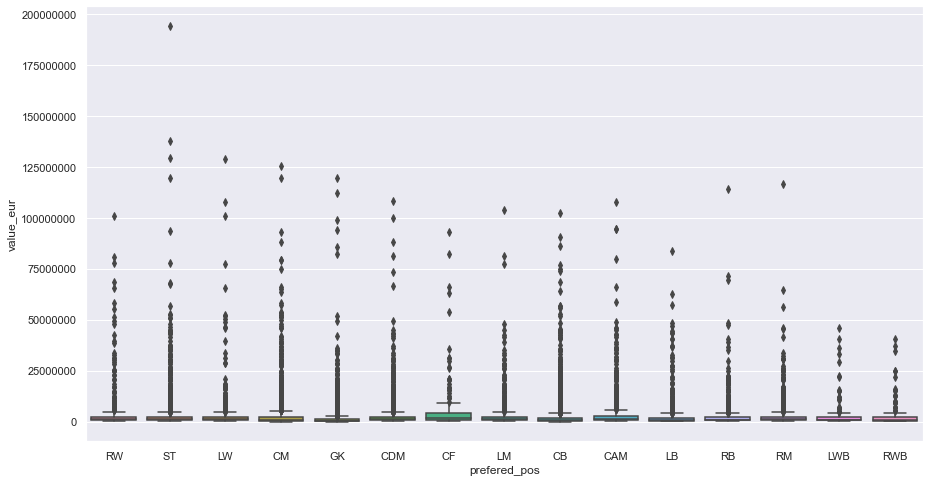

In [65]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x='prefered_pos',y='value_eur',data=df2)
plt.ticklabel_format(style='plain', axis='y')

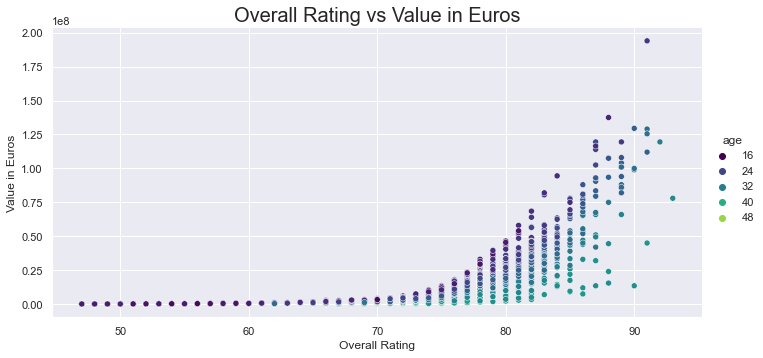

In [66]:
sns.relplot(x='overall',y='value_eur',hue='age',palette = 'viridis', sizes=(15, 200),aspect=2,data=df2)
plt.title('Overall Rating vs Value in Euros',fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

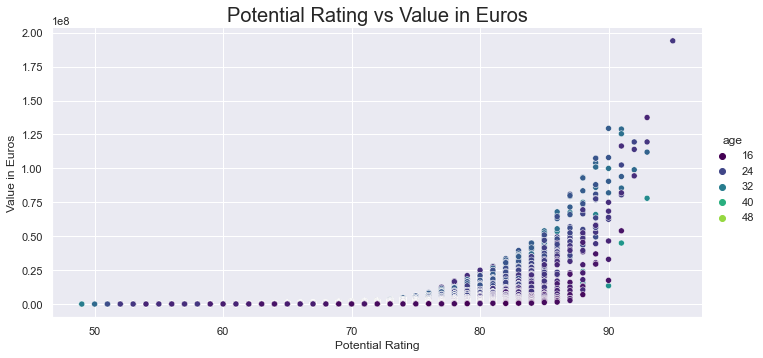

In [128]:
sns.relplot(x='potential',y='value_eur',hue='age',palette = 'viridis', sizes=(15, 200),aspect=2,data=df2)
plt.title('Potential Rating vs Value in Euros',fontsize = 20)
plt.xlabel('Potential Rating')
plt.ylabel('Value in Euros')
plt.show()

<AxesSubplot:>

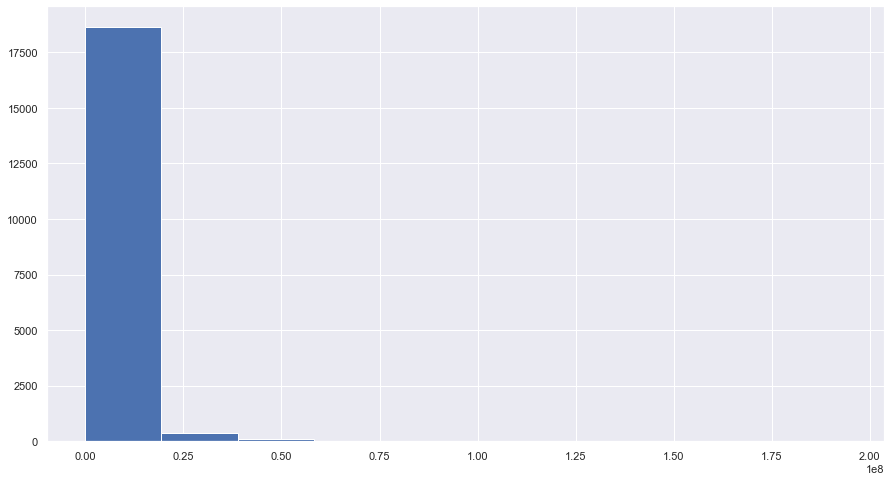

In [72]:
df['value_eur'].hist()

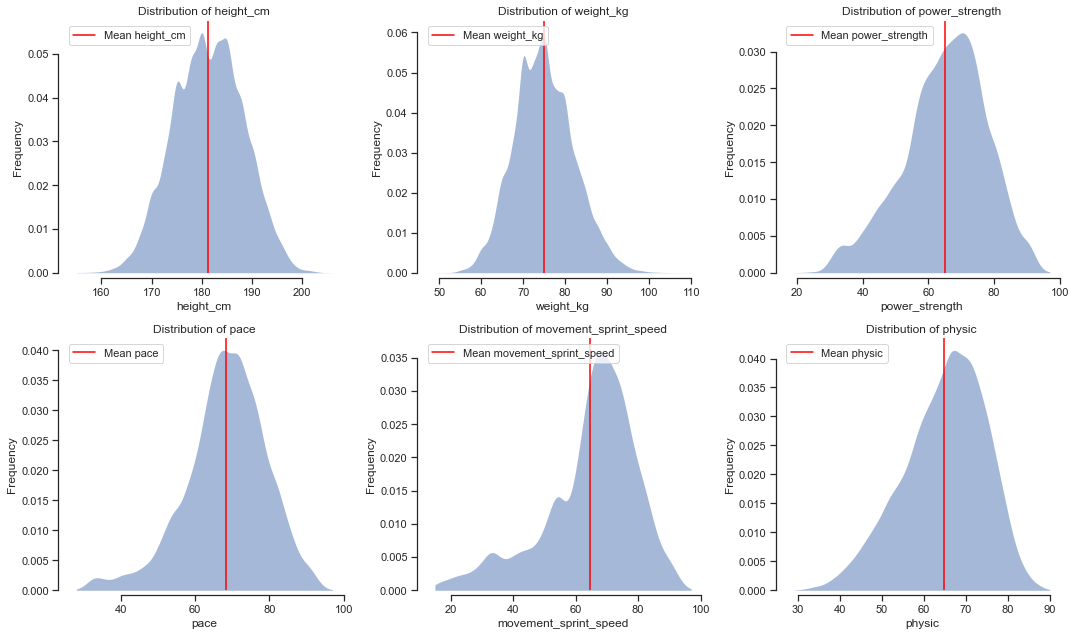

In [84]:
physical_attributes = [
    "height_cm",
    "weight_kg",
    "power_strength",
    "pace",
    "movement_sprint_speed",
    "physic"
    ]

f = plt.figure(figsize=(20, 9))
gs = f.add_gridspec(2, 4)

with sns.axes_style("white"):
    sns.set_style("ticks")
    x = 0
    y = 0
    for attr in physical_attributes:
        ax = f.add_subplot(gs[x, y])
        # sns.histplot(data=df, x=attr, bins=25, kde=True);
        sns.kdeplot(data=df, x=attr, cut=0, fill=True, palette="crest", linewidth=0, alpha=.5);
        plt.title(f"Distribution of {attr}");
        plt.axvline(x=np.mean(df[attr]),c='red',label=f'Mean {attr}')
        plt.xlabel(attr);
        plt.ylabel("Frequency");
        plt.legend(loc="upper left")
        sns.despine(trim=True, offset=5)
        y+=1
        if (y % 3) == 0:
            y = 0
            x +=1

f.tight_layout()

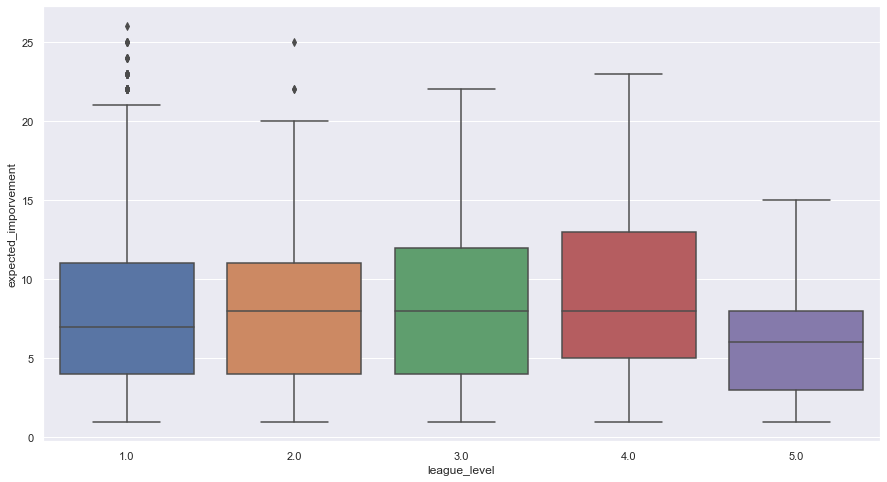

In [82]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x='league_level',y='expected_imporvement',data=df_growth)
plt.ticklabel_format(style='plain', axis='y')

In [98]:
df_growth.league_level.value_counts()

1.0    9678
2.0    1805
3.0     864
4.0     437
5.0      19
Name: league_level, dtype: int64

In [107]:
df_growth.groupby('league_level')[['expected_imporvement']].max()

,expected_imporvement
league_level,
1.0,26
2.0,25
3.0,22
4.0,23
5.0,15


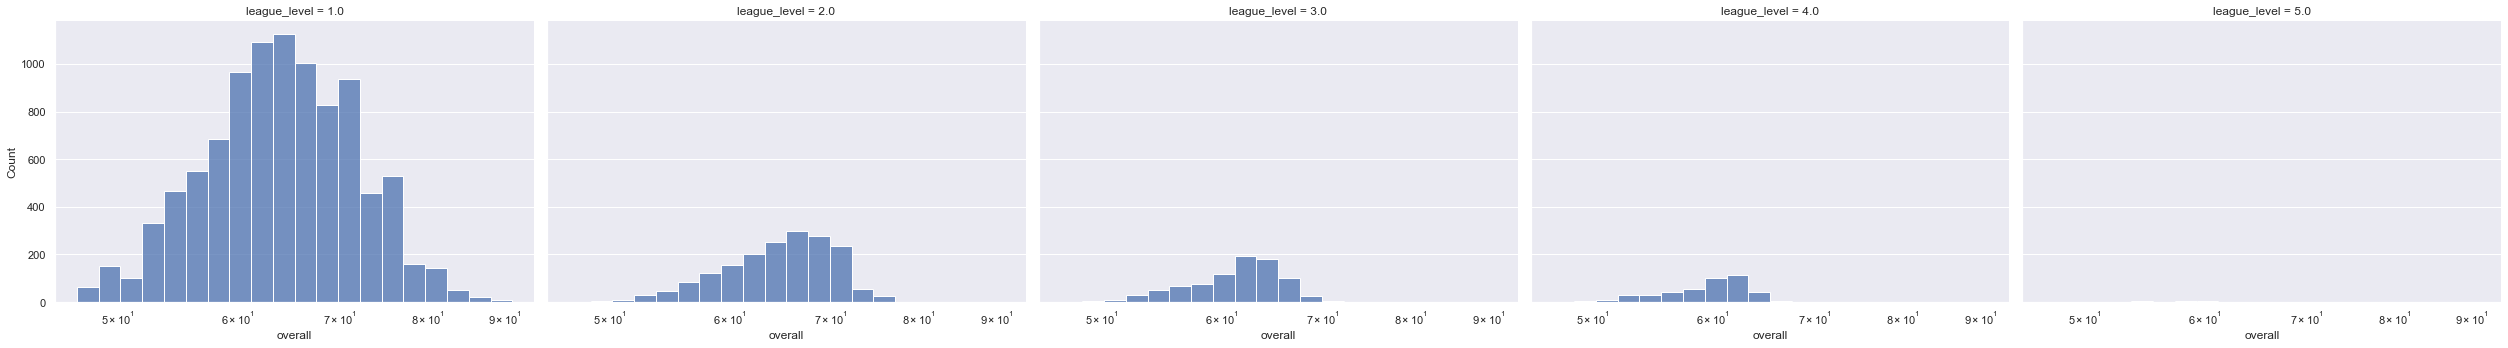

In [97]:
sns.displot(
  data=df_growth,
  x="overall",
  col="league_level",
  kind="hist",
  aspect=1.4,
  log_scale=10,
  bins=20
)
plt.ticklabel_format(style='plain', axis='y')

In [111]:
df_growth.groupby('league_level')[['potential']].max()

,potential
league_level,
1.0,95
2.0,86
3.0,84
4.0,80
5.0,70


In [112]:
df_growth[(df_growth['league_level']==3) &(df_growth['potential']==84)]

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,prefered_pos,expected_imporvement
13172,258932,L. Barry,Louie Mark Barry,"ST, LW",63,84,1500000.0,5000.0,18,174,...,38,42,40,35,35,35,40,14+2,ST,21


In [110]:
df_growth[(df_growth['league_level']==4) &(df_growth['expected_imporvement']==23)]

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,prefered_pos,expected_imporvement
18846,263975,K. N'Mai,Kelly N'Mai,"CAM, LM, RM",52,75,250000.0,500.0,17,168,...,39,45,43,34,34,34,43,15+2,CAM,23


In [124]:

def is_bench(d):
    if d in ("SUB", "RES", ""):
        return True 
    return False

df2['is_bench']=df2['club_position'].apply(is_bench)

df2.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,...,lb,lcb,cb,rcb,rb,gk,prefered_pos,expected_imporvement,is_starter,is_bench
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,...,61,50,50,50,61,19+3,RW,0,None,False
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185,...,61,60,60,60,61,19+3,ST,0,None,False
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,...,60,53,53,53,60,20+3,ST,0,None,False
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175,...,62,50,50,50,62,20+3,LW,0,None,False
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,...,75,69,69,69,75,21+3,CM,0,None,False


In [118]:
df2['club_position'].value_counts()

SUB    8299
RES    3168
RCB     701
GK      701
LCB     701
RB      515
LB      515
ST      476
RCM     470
LCM     470
LM      410
RM      410
CAM     292
LDM     223
RDM     223
LS      223
RS      223
CB      186
RW      185
LW      185
CDM     168
RWB     116
LWB     116
CM       83
RF       35
LF       35
LAM      21
RAM      21
CF        7
Name: club_position, dtype: int64

## Baseline Model


In [46]:
# positions = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',
#            'rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

# for col in positions:
#     df22[col] = df22[col].str.split('+',n=1,expand = True)[0]
#     df22[col].astype('int32')
    
#     df21[col] = df21[col].str.split('+',n=1,expand = True)[0]
#     df21[col].astype('int32')
    
#     df20[col] = df20[col].str.split('+',n=1,expand = True)[0]
#     df20[col].astype('int32')
    
#     df19[col] = df19[col].str.split('+',n=1,expand = True)[0]
#     df19[col].astype('int32')
    
#     df18[col] = df18[col].str.split('+',n=1,expand = True)[0]
#     df18[col].astype('int32')

ValueError: invalid literal for int() with base 10: '79-1'

### Data Load

In [95]:
def is_bench(d):
    if d in ("SUB", "RES", ""):
        return True 
    return False


In [5]:
df_22 = pd.read_csv('../raw_data/fifa22/players_22.csv')
df_21 = pd.read_csv('../raw_data/fifa22/players_21.csv')
df_20 = pd.read_csv('../raw_data/fifa22/players_20.csv')
df_19 = pd.read_csv('../raw_data/fifa22/players_19.csv')
df_18 = pd.read_csv('../raw_data/fifa22/players_18.csv')

/var/folders/tc/0tkkgmdd25n0rh3_pjfhw6mw0000gp/T/ipykernel_20355/982689103.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_22 = pd.read_csv('../raw_data/fifa22/players_22.csv')
/var/folders/tc/0tkkgmdd25n0rh3_pjfhw6mw0000gp/T/ipykernel_20355/982689103.py:5: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_18 = pd.read_csv('../raw_data/fifa22/players_18.csv')


In [47]:
to_drop = ['club_logo_url','nation_flag_url','club_flag_url','nation_logo_url','player_face_url','dob','player_url',
           'real_face','nation_jersey_number','nation_position','club_loaned_from','long_name','player_url'
          ,'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',
           'rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']



In [83]:
df22 = df_22.drop(to_drop, axis = 1)
df21 = df_21.drop(to_drop, axis = 1)
df20 = df_20.drop(to_drop, axis = 1)
df19 = df_19.drop(to_drop, axis = 1)
df18 = df_18.drop(to_drop, axis = 1)

In [84]:
df21.dtypes

sofifa_id                    int64
short_name                  object
player_positions            object
overall                      int64
potential                    int64
                            ...   
goalkeeping_kicking          int64
goalkeeping_positioning      int64
goalkeeping_reflexes         int64
goalkeeping_speed          float64
gk                          object
Length: 72, dtype: object

In [85]:
pos22 = df22['player_positions']
pos21 = df21['player_positions']
pos20 = df20['player_positions']
pos19 = df19['player_positions']
pos18 = df18['player_positions']

In [86]:

pref_pos_22 = []
pref_pos_21 = []
pref_pos_20 = []
pref_pos_19 = []
pref_pos_18 = []

for i in pos22:
    a = i.split(',')
    pref_pos_22.append(a[0])
df22['prefered_pos'] = pref_pos_22

for i in pos21:
    a = i.split(',')
    pref_pos_21.append(a[0])
df21['prefered_pos'] = pref_pos_21


for i in pos20:
    a = i.split(',')
    pref_pos_20.append(a[0])
df20['prefered_pos'] = pref_pos_20

for i in pos19:
    a = i.split(',')
    pref_pos_19.append(a[0])
df19['prefered_pos'] = pref_pos_19

for i in pos18:
    a = i.split(',')
    pref_pos_18.append(a[0])
df18['prefered_pos'] = pref_pos_18

In [87]:
df22 = df22.drop('player_positions', axis = 1)
df21 = df21.drop('player_positions', axis = 1)
df20 = df20.drop('player_positions', axis = 1)
df19 = df19.drop('player_positions', axis = 1)
df18 = df18.drop('player_positions', axis = 1)

In [88]:

df22['prefered_pos'] = df22['prefered_pos'].astype('category')
df21['prefered_pos'] = df21['prefered_pos'].astype('category')
df20['prefered_pos'] = df20['prefered_pos'].astype('category')
df19['prefered_pos'] = df19['prefered_pos'].astype('category')
df18['prefered_pos'] = df18['prefered_pos'].astype('category')


In [96]:
dfs = [df18, df19, df20, df21,df22]

for frame in dfs:
    frame['is_bench'] = frame['club_position'].apply(is_bench)

In [103]:
df18.dtypes

sofifa_id                  int64
short_name                object
overall                    int64
potential                  int64
value_eur                float64
                          ...   
goalkeeping_reflexes       int64
goalkeeping_speed        float64
gk                        object
prefered_pos            category
is_bench                    bool
Length: 73, dtype: object

### Join Dataframes

In [99]:

df_all = df22.join(df21, rsuffix='_21')
df_all = df_all.join(df20, rsuffix='_20')
df_all = df_all.join(df19, rsuffix='_19')
df_all = df_all.join(df18, rsuffix='_18')



In [102]:
df_all.dtypes

sofifa_id                     int64
short_name                   object
overall                       int64
potential                     int64
value_eur                   float64
                             ...   
goalkeeping_reflexes_18     float64
goalkeeping_speed_18        float64
gk_18                        object
prefered_pos_18            category
is_bench_18                  object
Length: 365, dtype: object

In [101]:
feat_categorical_nunique = df_all.select_dtypes("object").nunique()
# feat_categorical_nunique.sum()
print(feat_categorical_nunique.keys())

Index(['short_name', 'club_name', 'league_name', 'club_position',
       'club_joined', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type', 'player_tags', 'player_traits', 'gk', 'short_name_21',
       'club_name_21', 'league_name_21', 'club_position_21', 'club_joined_21',
       'nationality_name_21', 'preferred_foot_21', 'work_rate_21',
       'body_type_21', 'player_tags_21', 'player_traits_21', 'gk_21',
       'is_bench_21', 'short_name_20', 'club_name_20', 'league_name_20',
       'club_position_20', 'club_joined_20', 'nationality_name_20',
       'preferred_foot_20', 'work_rate_20', 'body_type_20', 'player_tags_20',
       'player_traits_20', 'gk_20', 'is_bench_20', 'short_name_19',
       'club_name_19', 'league_name_19', 'club_position_19', 'club_joined_19',
       'nationality_name_19', 'preferred_foot_19', 'work_rate_19',
       'body_type_19', 'player_tags_19', 'player_traits_19', 'gk_19',
       'is_bench_19', 'short_name_18', 'club_name_18', 'league_name

In [94]:
for index, col in enumerate(feat_categorical_nunique.keys()):
    print(f"{col:<26} | ", end="")
    if (index % 3 == 2):
        print("\n", end="")

short_name                 | club_name                  | league_name                | 
club_position              | club_joined                | nationality_name           | 
preferred_foot             | work_rate                  | body_type                  | 
player_tags                | player_traits              | gk                         | 
short_name_21              | club_name_21               | league_name_21             | 
club_position_21           | club_joined_21             | nationality_name_21        | 
preferred_foot_21          | work_rate_21               | body_type_21               | 
player_tags_21             | player_traits_21           | gk_21                      | 
short_name_20              | club_name_20               | league_name_20             | 
club_position_20           | club_joined_20             | nationality_name_20        | 
preferred_foot_20          | work_rate_20               | body_type_20               | 
player_tags_20             | pla